In [7]:
import calendar
import numpy as np
import pygrib
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cmaps

In [59]:
def draw_worldmap(data, vmin=0, vmax=0.1):
    #cmap = cmaps.WhiteBlueGreenYellowRed
    projection = ccrs.PlateCarree(central_longitude=180)
    img_extent = (-180, 180, -90, 90)
    fig = plt.figure()
    ax = plt.subplot(projection=projection)
    ax.coastlines()
    mat = ax.matshow(data,
                     origin='upper',
                     extent=img_extent,
                     transform=projection,
                     vmin=vmin, vmax=vmax,
                     cmap='WhiteBlueGreenYellowRed'
                    )
    cbar = fig.colorbar(mat,
                        ax=ax,
                        orientation='horizontal'
                       )
    plt.show()

In [93]:
def open_grib(name):
    dirname = '/work/common/precipitation/ECMWF_forecast/tmp/'
    path = dirname + name
    grbs = pygrib.open(path
    grb = grbs.select()
    print(f'len(grb): {len(grb)}')
    return grb

len(grb): 200


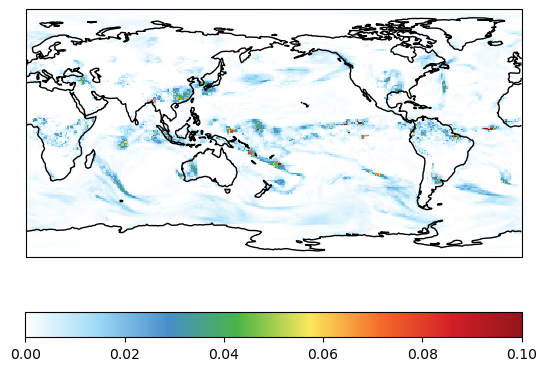

len(grb): 375


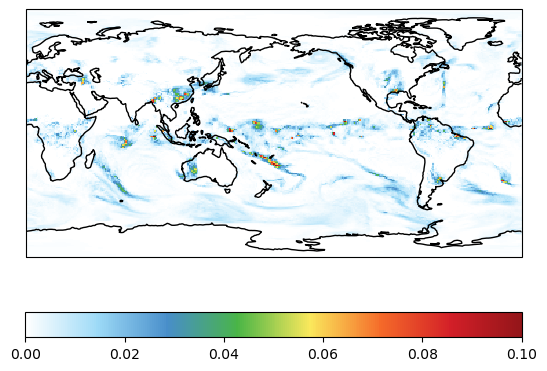

In [103]:
# turn it to numpy array? -> (ensemble_index, hour_index, year_index, lat, lon)
"""
[0]: ensemble0, 1993, 24
[1]: ensemble0, 1993, 48
[2]: ensemble0, 1993, 72
[10]: ensemble0, 1996, 48
[15]: ensemble1, 1993, 24
"""

grb1 = open_grib('1993-1996_24-48.grib') # 1994, 24, 48, 72
value1 = grb1[8].values.reshape(181, 360)
draw_worldmap(value1)

grb2 = open_grib('1993-1997_24-72.grib') # 1993, 1994, 24, 48, 72
value2 = grb2[15].values.reshape(181, 360)
draw_worldmap(value2)

In [106]:
lat20 = int(89.5 - 19.5)
lon100 = int(99.5 - 0.5)
lats = [lat20-5, lat20+16] # N25-5
lons = [lon100-10, lon100+11] # E90-110

value3 = value2.copy()
value3[lats[0] : lats[1], lons[0] : lons[1]] = 1
draw_worldmap